### Лабораторна робота №4 Бондарчука Євгенія БС-82
### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

 

<p1>1.</p1>   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.DataFrame(
    {
        'Normal_1': np.random.normal(loc=10, scale=5, size=20),
        'Normal_2': np.random.standard_normal(size=20),
        'Normal_3': np.random.randn(20),
        'Logistic': np.random.logistic(loc=3, scale=7, size=20),
        'Gamma'   : np.random.gamma(shape=1,size=20),
        'Uniform' : np.random.uniform(size=20),
    }
)
df

,Normal_1,Normal_2,Normal_3,Logistic,Gamma,Uniform
0,14.548495,-0.062584,0.110949,7.854612,0.182556,0.919717
1,2.290466,-0.953102,0.959402,9.449692,1.345058,0.987296
2,9.625672,-0.785212,-0.792893,-8.486703,0.202040,0.222426
3,14.774324,1.172037,-0.008590,4.244427,0.185034,0.991883
4,8.034983,1.086496,-0.428558,4.868444,0.555338,0.569953
5,15.275299,-1.019686,0.519194,-0.798757,1.511922,0.288385
6,13.409864,0.790765,1.891159,-13.996145,0.053947,0.341829
7,3.299409,0.015809,-0.728206,-3.861493,0.112102,0.259409
8,9.504493,-0.733789,-0.552484,8.737199,0.952013,0.153968
9,7.401315,0.758850,-0.958181,12.555162,0.044319,0.045003


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [3]:
df = pd.DataFrame({key: sorted(values) for key, values in df.transpose().iterrows()})
df.head()

,Normal_1,Normal_2,Normal_3,Logistic,Gamma,Uniform
0,2.290466,-1.649739,-2.426824,-16.116773,0.007653,0.045003
1,3.299409,-1.536098,-0.958181,-13.996145,0.044319,0.099289
2,5.153218,-1.019686,-0.792893,-8.486703,0.053947,0.153968
3,5.862581,-0.953102,-0.728206,-6.807456,0.079891,0.222426
4,5.949479,-0.785212,-0.668878,-3.861493,0.112102,0.259409


In [4]:
def get_mean(array,n):
    alll=0
    for i in range(n):
        alll+=array[i]
    return alll/n
mean_data = {i: get_mean(df[i],20) for i in df}

In [5]:
def get_s_sq(array,n, mean_):
    p=0
    for i in range(n):
        p+=((array[i]-mean_)**2)
    return p
s_sq = {i: get_s_sq(df[i],20,mean_data[i]) for i in df}

In [6]:
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def get_b(array,n):
    m=0
    for i in range(n//2):
        m+=(a[i]*(array[(n-1)-i]-array[i]))
    return m
    

b = {i: get_b(df[i],20) for i in df}

In [7]:
def get_W(b_v, s_sqq_):
    return (b_v**2)/s_sqq_

W = {i: get_W(b[i], s_sq[i]) for i in df}

WTheory = sts.shapiro(df['Normal_1'])
W, WTheory

({'Normal_1': 0.9719846517645063,
  'Normal_2': 0.9488572853570604,
  'Normal_3': 0.965470302050404,
  'Logistic': 0.9758979811768277,
  'Gamma': 0.8479978964605731,
  'Uniform': 0.8959980825045503},
 (0.9720432758331299, 0.797315239906311))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [8]:
col = ["Variable", "Statistics", "Distribution"]
data_df = pd.DataFrame(columns = col)
data_df

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [9]:
data_df["Variable"] = df.keys()
data_df

,Variable,Statistics,Distribution
0,Normal_1,NaN,NaN
1,Normal_2,NaN,NaN
2,Normal_3,NaN,NaN
3,Logistic,NaN,NaN
4,Gamma,NaN,NaN
5,Uniform,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [10]:
def calibration(value,theory):
    if(value >= theory):
        l = 'normal'
    else:
        l = 'non-normal'
    return l


data_df["Distribution"] = [(calibration(W[i],WTheory[0]))for i in data_df["Variable"]]

data_df

,Variable,Statistics,Distribution
0,Normal_1,NaN,non-normal
1,Normal_2,NaN,non-normal
2,Normal_3,NaN,non-normal
3,Logistic,NaN,normal
4,Gamma,NaN,non-normal
5,Uniform,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [14]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    if 'normal' in var:
        data_df["Statistics"][i] = f'{df[var].mean()} [{df[var].std()}]'

data_df

,Variable,Statistics,Distribution
0,Normal_1,9.411014874510364 [6.173731873899845; ...,non-normal
1,Normal_2,-0.025571670121294823 [-0.746644543346...,non-normal
2,Normal_3,0.05117953605045932 [-0.64127250678829...,non-normal
3,Logistic,5.193415019663308 [-1.5644410144690504...,normal
4,Gamma,0.6253330500074985 [0.1649423649869109...,non-normal
5,Uniform,0.4002024177181328 [0.2811412123812067...,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [12]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    if 'normal' not in var:
        data_df["Statistics"][i] = \
        f'{df[var].median()} \
        [{df[var].quantile(0.25)}; {df[var].quantile(0.75)}]'

data_df

,Variable,Statistics,Distribution
0,Normal_1,9.411014874510364 [6.173731873899845; ...,non-normal
1,Normal_2,-0.025571670121294823 [-0.746644543346...,non-normal
2,Normal_3,0.05117953605045932 [-0.64127250678829...,non-normal
3,Logistic,5.193415019663308 [-1.5644410144690504...,normal
4,Gamma,0.6253330500074985 [0.1649423649869109...,non-normal
5,Uniform,0.4002024177181328 [0.2811412123812067...,non-normal


8. Зберегти таблицю в пдф форматі

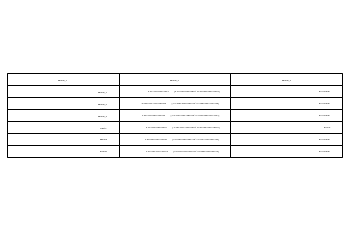

In [13]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(data_df)):
    cell_text.append(data_df.iloc[row])

ax.table(cellText=cell_text, colLabels=df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()